# **Análise de Atividades Físicas na Academia**
dataset do kaggle disponível em: https://www.kaggle.com/datasets/adilshamim8/workout-and-fitness-tracker-data

# 0 Importações

## 0.1 Importação das bibliotecas

In [4]:
#Bibliotecas de manipulação de dados
import pandas as pd

#Bibliotecas de cálculos
import numpy as np
import math

#Bibliotecas de visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

## 0.2 Carregamento dos dados

In [6]:
df_raw = pd.read_csv("workout_fitness_tracker_data.csv")
df_raw.head()

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized


# 1.0 Descrição dos dados

In [8]:
df1 = df_raw.copy()

## 1.1 Renomeando e descrevendo colunas

In [10]:
colunas = list(df1.columns)

colunas_corretas = [x.split("(")[0].strip() for x in colunas]
colunas_corretas = [x.lower().replace(" ", "_") for x in colunas_corretas]

df1.columns = colunas_corretas

- User_ID: Identificador único para cada usuário.
- Age: Idade do usuário (18-60 anos).
- Gender: Gênero (Masculino, Feminino, Outro).
- Height_cm: Altura do usuário em centímetros.
- Weight_kg: Peso do usuário em quilogramas.
- Workout_Type: Tipo de treino (Cardio, Força, Yoga, HIIT, Ciclismo, Corrida).
- Workout_Duration_mins: Tempo total gasto no treino.
- Calories_Burned: Total de calorias queimadas durante o treino.
- Heart_Rate_bpm: Frequência cardíaca média durante o treino.
- Steps_Taken: Número de passos registrados (para treinos de caminhada/corrida).
- Distance_km: Distância percorrida em quilômetros.
- Workout_Intensity: Intensidade do treino (Baixa, Média, Alta).
- Sleep_Hours: Horas de sono antes do treino.
- Water_Intake_liters: Água consumida em litros.
- Daily_Calories_Intake: Total de calorias consumidas em um dia.
- Resting_Heart_Rate_bpm: Frequência cardíaca em repouso.
- VO2_Max: Capacidade de consumo de oxigênio (indicador de aptidão cardiovascular).
- Body_Fat_percentage: Percentual estimado de gordura corporal.
- Mood_Before_Workout: Humor antes do treino (Feliz, Neutro, Cansado, Estressado).
- Mood_After_Workout: Humor após o treino (Energizado, Neutro, Fatigado).

## 1.2 Dimensão dos dados

In [13]:
print(f"Linhas: {df1.shape[0]}\nColunas: {df1.shape[1]}")

Linhas: 10000
Colunas: 20


## 1.3 Tipo das colunas

In [15]:
df1.dtypes

user_id                    int64
age                        int64
gender                    object
height                     int64
weight                     int64
workout_type              object
workout_duration           int64
calories_burned            int64
heart_rate                 int64
steps_taken                int64
distance                 float64
workout_intensity         object
sleep_hours              float64
water_intake             float64
daily_calories_intake      int64
resting_heart_rate         int64
vo2_max                  float64
body_fat                 float64
mood_before_workout       object
mood_after_workout        object
dtype: object

## Checagem de NAs

In [17]:
df1.isna().sum()

user_id                  0
age                      0
gender                   0
height                   0
weight                   0
workout_type             0
workout_duration         0
calories_burned          0
heart_rate               0
steps_taken              0
distance                 0
workout_intensity        0
sleep_hours              0
water_intake             0
daily_calories_intake    0
resting_heart_rate       0
vo2_max                  0
body_fat                 0
mood_before_workout      0
mood_after_workout       0
dtype: int64

## 1.5 Descrição dos dados

In [19]:
df_num = df1.select_dtypes( include=["int64", "float64"] )
df_cat = df1.select_dtypes( exclude=["int64", "float64"] )

### 1.5.1 Dados numéricos

In [21]:
medias = pd.DataFrame( df_num.apply( np.mean ) ).T 
medianas = pd.DataFrame( df_num.apply( np.median ) ).T 

In [22]:
desvio_padrao = pd.DataFrame( df_num.apply( np.std ) ).T
minimo = pd.DataFrame( df_num.apply( min ) ).T
maximo = pd.DataFrame( df_num.apply( max ) ).T
intervalo = pd.DataFrame( df_num.apply(lambda x: x.max() - x.min()) ).T
skew = pd.DataFrame( df_num.apply( lambda x: x.skew())).T 
kurtosis = pd.DataFrame( df_num.apply(lambda x: x.kurtosis() ) ).T

In [23]:
metricas_numericas = pd.concat( [minimo, maximo, intervalo, medias, medianas, desvio_padrao, skew, kurtosis] ).T.reset_index()
metricas_numericas.columns = (["atributos","minimo","maximo","intervalo","medias","medianas","desvio_padrao","skew","kurtosis"])

In [24]:
metricas_numericas

,atributos,minimo,maximo,intervalo,medias,medianas,desvio_padrao,skew,kurtosis
0,user_id,1.0,10000.0,9999.0,5000.500000,5000.50,2.886751e+03,0.000000,-1.200000
1,age,18.0,59.0,41.0,38.390100,38.00,1.217103e+01,0.006229,-1.213385
2,height,150.0,199.0,49.0,174.275100,174.00,1.444026e+01,0.017389,-1.203495
3,weight,50.0,119.0,69.0,84.903000,85.00,2.018893e+01,-0.024774,-1.194889
4,workout_duration,10.0,119.0,109.0,64.464800,64.00,3.181336e+01,-0.008162,-1.184793
5,calories_burned,100.0,999.0,899.0,552.100800,554.00,2.606169e+02,-0.015803,-1.205462
6,heart_rate,80.0,179.0,99.0,129.526700,130.00,2.887271e+01,-0.003818,-1.202287
7,steps_taken,1000.0,19998.0,18998.0,10455.496600,10434.50,5.486149e+03,0.006778,-1.198441
8,distance,0.5,15.0,14.5,7.820745,7.85,4.158940e+00,-0.012480,-1.185227
9,sleep_hours,4.0,10.0,6.0,6.982820,7.00,1.708652e+00,0.005073,-1.164770


In [25]:
df1.drop(['vo2_max', 'body_fat', 'water_intake'], axis=1, inplace=True)

### 1.5.2 Dados categóricos

In [27]:
df_cat.apply(lambda x: x.unique().shape[0])

gender                 3
workout_type           6
workout_intensity      3
mood_before_workout    4
mood_after_workout     3
dtype: int64

<Axes: xlabel='workout_intensity', ylabel='count'>

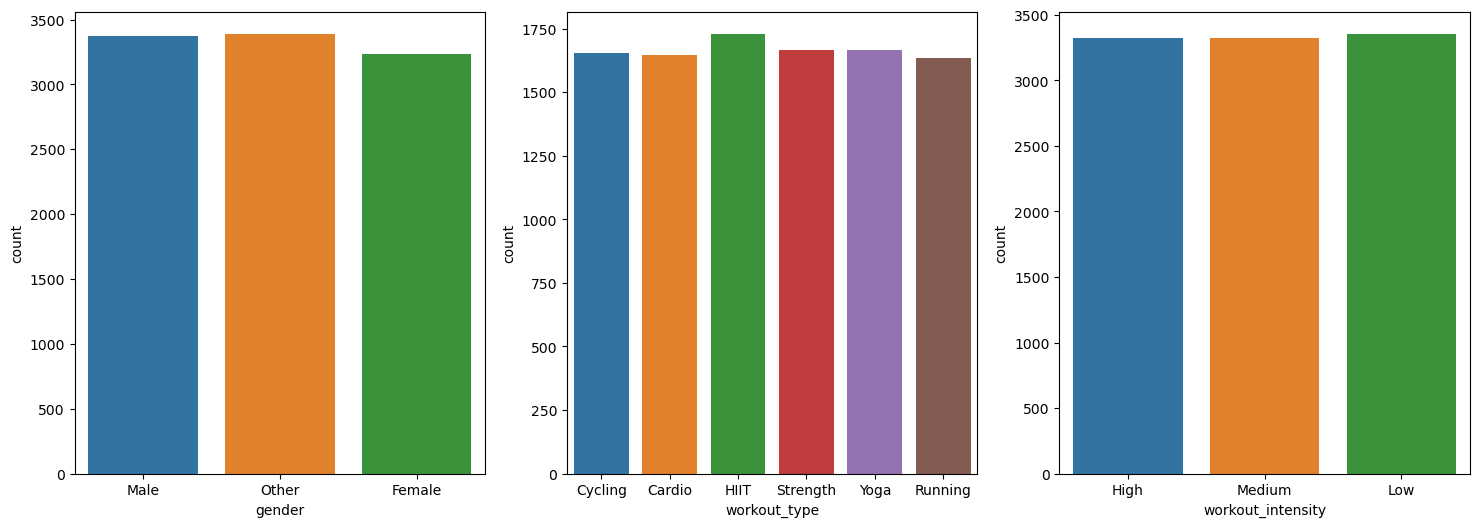

In [28]:
plt.figure(figsize=(18, 6))

plt.subplot(1,3,1)
sns.countplot(x='gender', data=df_cat)

plt.subplot(1,3,2)
sns.countplot(x = "workout_type", data=df_cat)

plt.subplot(1,3,3)
sns.countplot(x = "workout_intensity", data=df_cat)

<Axes: xlabel='mood_after_workout', ylabel='count'>

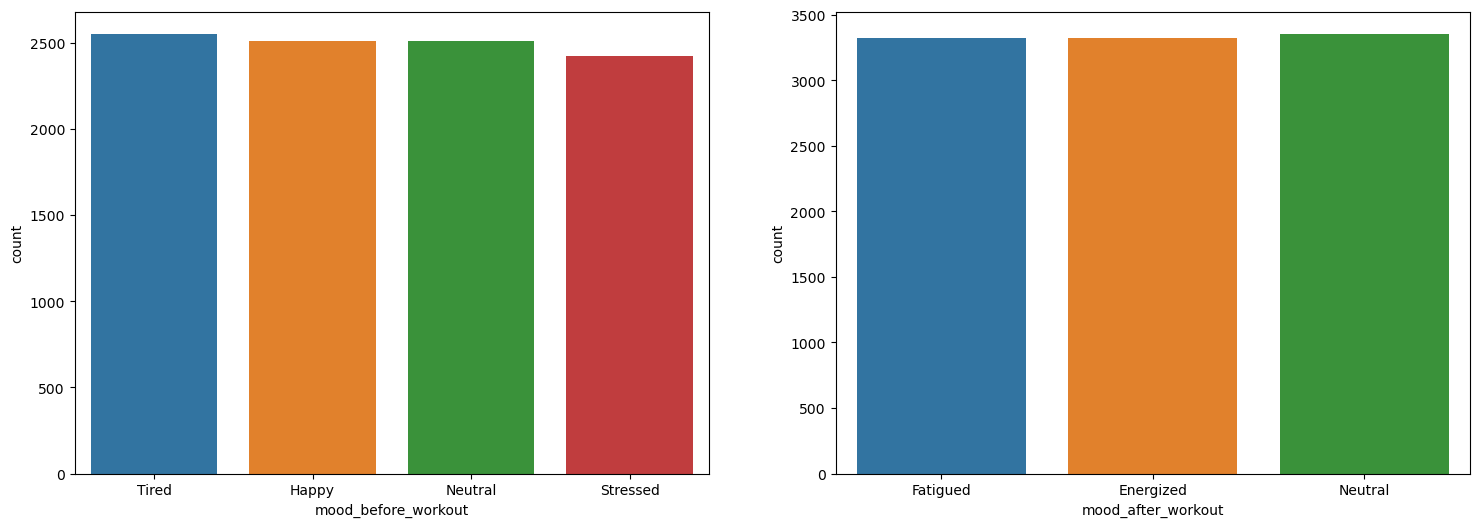

In [29]:
plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
sns.countplot(x='mood_before_workout', data=df_cat)

plt.subplot(1,2,2)
sns.countplot(x = "mood_after_workout", data=df_cat)

# 2.0 Feature engeneering

In [31]:
df2 = df1.copy()

In [59]:
#IMC
df2["imc"] = df2["weight"] / (df2["height"]/100) ** 2

#Calorias queimadas / minuto
df2["calories_per_min"] = df2["calories_burned"] / df2["workout_duration"]

In [61]:
df2.head()

,user_id,age,gender,height,weight,workout_type,workout_duration,calories_burned,heart_rate,steps_taken,distance,workout_intensity,sleep_hours,water_intake,daily_calories_intake,resting_heart_rate,mood_before_workout,mood_after_workout,imc,calories_per_min
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,Tired,Fatigued,32.326531,4.860759
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,Happy,Energized,45.437949,8.383562
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,Happy,Fatigued,20.370370,20.000000
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,Neutral,Neutral,37.527408,17.230769
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,Stressed,Energized,15.676480,7.321429
